In [4]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

### Plotting a Mixture of Normals
The whole reason that we use plotting software is to visualize the data that we are working with, so let’s do that. We provide you two files, which store resulting data from an experiment. 

   The file ``points.dlm`` is a tab-delimited file (**.dlm** stands for “delimited”). Such a format is common when writing reasonably small files, and is useful if you expect to use a data set across different programs or platforms. See the documentation for the command [numpy.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to see how to read this file. The file ``labels.npy`` is a numpy binary file, representing a numpy object. The **.npy** file format is specific to numpy. Many languages (e.g., R and MATLAB) have their own such language-specific file formats for saving variables, workspaces, etc. 
   
   These formats tend to be more space-efficient, typically at the cost of program-dependence. It is best to avoid such files if you expect to deal with the same data set in several different environments (e.g., you run experiments in MATLAB and do your statistical analysis in R). .npy files are opened using [numpy.load](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

   The observations in my experiment were generated from a distribution that is approximately normal, but not precisely so. Let’s explore how well the normal approximation holds.

1.  **Read the two files into numpy.** Please include both ``labels.npy`` and ``points.dlm`` in your homework submission.  
    The former of these should yield a numpy array of 0s and 1s, and the latter should yield a 100-by-2 numpy array, in which each row corresponds to a 2-dimensional point.  
    The i-th entry of the array in labels.npy corresponds to the cluster membership label of the i-th row of the matrix stored in points.dlm.

In [4]:
import numpy as np
points = np.loadtxt(r'points.dlm', delimiter='\t')
labels = np.load(r'labels.npy')
print(points)
print(labels)


(100, 2)
(100,)


2. **Generate a scatter plot of the data.** Each data point should appear as an x (often called a cross in data visualization packages), colored according to its cluster membership as given by points.npy. The points with cluster label 0 should be colored blue, and those with cluster label 1 should be colored red. Set the x and y axes to both range from 0 to 1. Adjust the size of the point markers to what you believe to be reasonable (i.e., aesthetically pleasing, visible, etc).


In [5]:
#產生聚類0跟1
import numpy as np
c_0 = points[labels == 0]
c_1 = points[labels == 1]

print(c_0.shape)
print(c_1.shape)

(41, 2)
(59, 2)


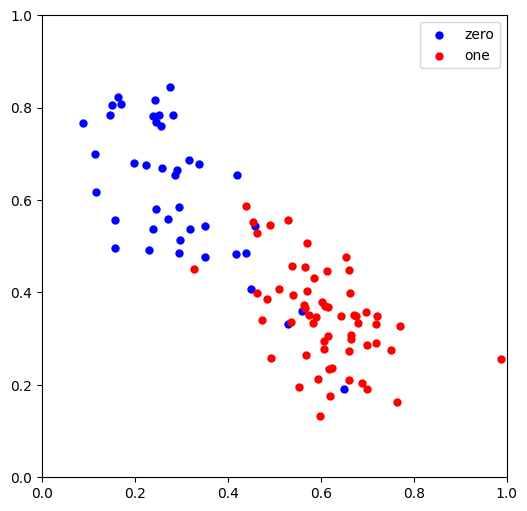

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#畫出資料點
plt.figure(figsize=(4, 4))
plt.scatter(points[labels == 0, 0], points[labels == 0, 1], c='blue', marker='.', label='zero', s=100)
plt.scatter(points[labels == 1, 0], points[labels == 1, 1], c='red', marker='.', label='one', s=100)

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend()
plt.show()

3. Theoretically, the data should approximate a mixture of normals with means and covariance matrices given by
$$ \mu_{0} = (0.2, 0.7)^{T}, \Sigma_{0} = \begin{bmatrix}0.015 & -0.011 \\ -0.011 & 0.018\end{bmatrix} $$
$$ \mu_{1} = (0.65, 0.3)^{T}, \Sigma_{1} = \begin{bmatrix}0.016 & -0.011 \\ -0.011 & 0.016\end{bmatrix} $$
**For each of these two normal distributions, add two contour lines corresponding to 1 and 2 "standard deviations" of the distribution.**   
We will take the 1-standard deviation contour to be the level set (which is an ellipse) of the normal distribution that encloses probability mass 0.68 of the distribution, and the 2-standard deviation contour to be the level set that encloses probability mass 0.95 of the distribution.   

   The contour lines for cluster 0 should be colored blue, and the lines for cluster 1 should be colored red. The contour lines will go off the edge of the 1-by-1 square that we have plotted. Do not worry about that. 

   Hint: these ellipses are really just confidence regions given by
   $$ (x-\mu)^{T}\Sigma^{-1}(x-\mu)\leqslant X_{2}^{2}(p)$$
   
   where $p$ is a probability and $X^{2}_{d}$ is the quantile function for the $X^{2}$ distribution with $d$ degrees of freedom. 
   
   Hint: use the optional argument <span style="font-family:Courier; font-size:1em;">levels</span> for the [pyplot.contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) function.

In [12]:
# find chi-square score
import numpy as np
from scipy.stats import chisquare,chi2

ob = np.array([np.sum(labels == 0),np.sum(labels == 1)])#聚類0跟1，點的數量

total = len(labels)
exp = np.array([total/2,total/2])#期望值是聚類頻數相等
chi_square = chi2.ppf(0.68, df=2)#chi-square 68%的臨界值
cri = chi2.ppf(0.95, df=2)#chi-square 95%的臨界值
print(np.array([chi_square,cri]))


[2.27886857 5.99146455]


In [15]:
# find mu0, mu1, sigma0, sigma1
import numpy as np
from scipy import linalg

mu0 = np.mean(c_0,axis=0)#用mean方法，找出聚類0的均值
mu1 = np.mean(c_1,axis=1)#用mean方法，找出聚類1的均值

sigma0 = np.cov(c_0,rowvar=False)#計算聚類0斜方差矩陣
sigma1 = np.cov(c_1,rowvar=False)#計算聚類1斜方差矩陣

print(mu0)
print(mu1)
print(sigma0)
print(sigma1)


[0.28778458 0.61900511]
[0.48739921 0.40785509 0.37594395 0.53816334 0.49367352 0.50877162
 0.4682615  0.45775612 0.46291414 0.49661009 0.3896754  0.55451083
 0.43032015 0.51945264 0.45831855 0.46171147 0.62200532 0.51297852
 0.48186768 0.49064827 0.4162709  0.52765094 0.42631185 0.39883745
 0.44211181 0.4453339  0.56604159 0.43502338 0.40248438 0.42979731
 0.46660029 0.53078844 0.52933915 0.43651155 0.44710238 0.46691105
 0.43574161 0.46288463 0.49595151 0.451016   0.54916878 0.49073583
 0.37440931 0.51135435 0.46676472 0.49770554 0.50386444 0.49221798
 0.50734126 0.52598491 0.51390711 0.48690046 0.46901836 0.36502947
 0.53547306 0.50443176 0.51134972 0.54313755 0.5130464 ]
[[ 0.01548782 -0.01343389]
 [-0.01343389  0.0233103 ]]
[[ 0.01032559 -0.00529558]
 [-0.00529558  0.0109397 ]]


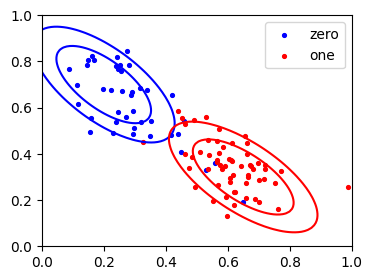

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, multivariate_normal

mu_0 = np.array([0.2, 0.7])
sigma_0 = np.array([[0.015, -0.011], [-0.011, 0.018]])
mu_1 = np.array([0.65, 0.3])
sigma_1 = np.array([[0.016, -0.011], [-0.011, 0.016]])

levels = [0.68, 0.95]
chi = [chi2.ppf(cl, df=2) for cl in levels]

X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))#100X100的網格計算密度
pos = np.dstack((X, Y))

rv0 = multivariate_normal(mu_0, sigma_0)#正態分布
rv1 = multivariate_normal(mu_1, sigma_1)

Z0 = rv0.pdf(pos)#機率密度
Z1 = rv1.pdf(pos)

#畫圖
plt.figure(figsize=(4, 3))
plt.scatter(points[labels == 0, 0], points[labels == 0, 1], c='blue', marker='.', label='zero', s=30)
plt.scatter(points[labels == 1, 0], points[labels == 1, 1 ], c='red', marker='.', label='one', s=30)

plt.contour(X, Y, Z0, levels=[chi[0], chi[1]], colors='blue', linestyles='-')
plt.contour(X, Y, Z1, levels=[chi[0], chi[1]], colors='red', linestyles='-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

4. Do the data appear normal? There should be at least one obvious outlier. **Add an annotation to your figure indicating one or more such outlier(s).** E.g., one outlier exist in the red zone.

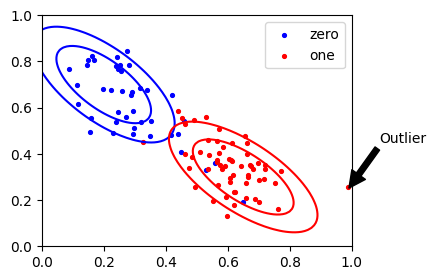

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, multivariate_normal

mu_0 = np.array([0.2, 0.7])
sigma_0 = np.array([[0.015, -0.011], [-0.011, 0.018]])
mu_1 = np.array([0.65, 0.3])
sigma_1 = np.array([[0.016, -0.011], [-0.011, 0.016]])

levels = [0.68, 0.95]
chi = [chi2.ppf(cl, df=2) for cl in levels]

X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
pos = np.dstack((X, Y))

rv0 = multivariate_normal(mu_0, sigma_0)
rv1 = multivariate_normal(mu_1, sigma_1)

Z0 = rv0.pdf(pos)
Z1 = rv1.pdf(pos)

plt.figure(figsize=(4, 3))
plt.scatter(points[labels == 0, 0], points[labels == 0, 1], c='blue', marker='.', label='zero', s=30)
plt.scatter(points[labels == 1, 0], points[labels == 1, 1 ], c='red', marker='.', label='one', s=30)

plt.contour(X, Y, Z0, levels=[chi[0], chi[1]], colors='blue', linestyles='-')
plt.contour(X, Y, Z1, levels=[chi[0], chi[1]], colors='red', linestyles='-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

outlier_points = [(0.99, 0.25)]#指出outliner
for outlier in outlier_points:
    plt.annotate('Outlier', xy=outlier, xytext=(outlier[0] + 0.1, outlier[1] + 0.2),
    arrowprops=dict(facecolor='black', shrink=0.01))

plt.show()